# Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
meta = pd.read_csv("./META.csv")
meta.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-11-27,26.040001,26.500000,25.459999,26.150000,26.150000,85760600
1,2012-11-28,25.940001,26.490000,25.750000,26.360001,26.360001,49205600
2,2012-11-29,26.500000,27.520000,26.160000,27.320000,27.320000,88759700
3,2012-11-30,27.260000,28.000000,26.760000,28.000000,28.000000,127049600
4,2012-12-03,28.000000,28.879999,26.980000,27.040001,27.040001,123526100


# Financial Data Analysis and Visualization

<h3>Plotting the closing price and volume over time to get a basic understanding of the stock's behavior

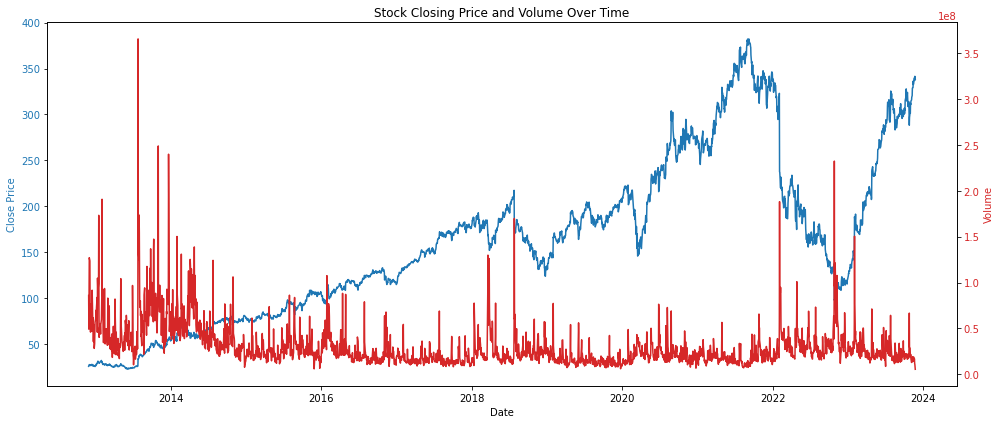

In [11]:
# Convert the 'Date' column to datetime
meta['Date'] = pd.to_datetime(meta['Date'])

# Plotting the closing price and volume
fig, ax1 = plt.subplots(figsize=(14, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color=color)
ax1.plot(meta['Date'], meta['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
ax2.plot(meta['Date'], meta['Volume'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Stock Closing Price and Volume Over Time')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


Next, we can analyze the stock's volatility. One common method is to look at the daily price changes. We can calculate the daily returns, which are the percentage change in the closing price from one day to the next. This will give us an idea of how much the stock price fluctuates on a day-to-day basis.

After that, we can calculate and plot moving averages. The moving average smooths out price data to create a single flowing line, making it easier to identify the direction of the trend. Commonly used moving averages are the 50-day and 200-day moving averages.

In [12]:
meta_data = meta

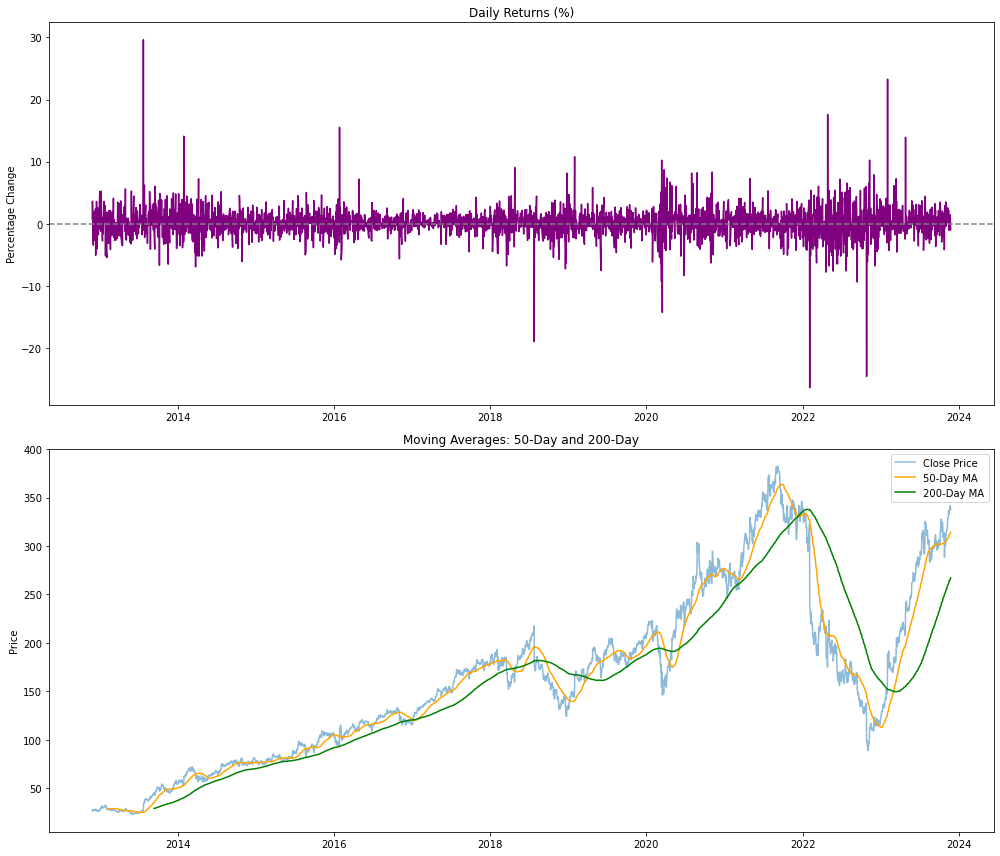

In [13]:
# Calculating daily returns as percentage change in closing price
meta_data['Daily Returns'] = meta_data['Close'].pct_change() * 100

# Calculating moving averages (50-day and 200-day)
meta_data['MA50'] = meta_data['Close'].rolling(window=50).mean()
meta_data['MA200'] = meta_data['Close'].rolling(window=200).mean()

# Plotting the daily returns, 50-day and 200-day moving averages
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Daily Returns
ax1.plot(meta_data['Date'], meta_data['Daily Returns'], color='purple')
ax1.set_title('Daily Returns (%)')
ax1.set_ylabel('Percentage Change')
ax1.axhline(y=0, color='gray', linestyle='--')

# Moving Averages
ax2.plot(meta_data['Date'], meta_data['Close'], label='Close Price', alpha=0.5)
ax2.plot(meta_data['Date'], meta_data['MA50'], label='50-Day MA', color='orange')
ax2.plot(meta_data['Date'], meta_data['MA200'], label='200-Day MA', color='green')
ax2.set_title('Moving Averages: 50-Day and 200-Day')
ax2.set_ylabel('Price')
ax2.legend()

plt.tight_layout()
plt.show()


# Time series visualization

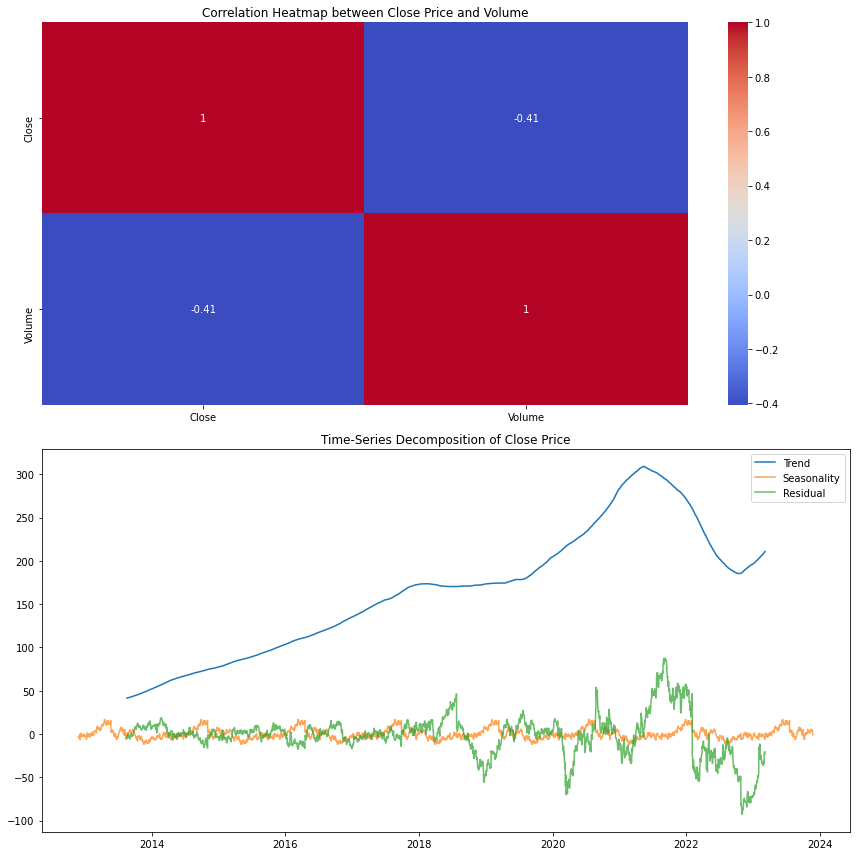

In [23]:
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# Correlation Analysis between Close Price and Volume
correlation_data = meta_data[['Close', 'Volume']].corr()

# Time-Series Decomposition of Close Price
decomposition = seasonal_decompose(meta_data['Close'], model='additive', period=365)  # using 365 days for yearly pattern
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the Correlation Heatmap and Decomposition
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Correlation Heatmap
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation Heatmap between Close Price and Volume')

# Decomposition Plot
axes[1].plot(meta_data['Date'], trend, label='Trend')

axes[1].plot(meta_data['Date'], seasonal, label='Seasonality', alpha=0.7)
axes[1].plot(meta_data['Date'], residual, label='Residual', alpha=0.7)
axes[1].set_title('Time-Series Decomposition of Close Price')
axes[1].legend()

plt.tight_layout()
plt.show()


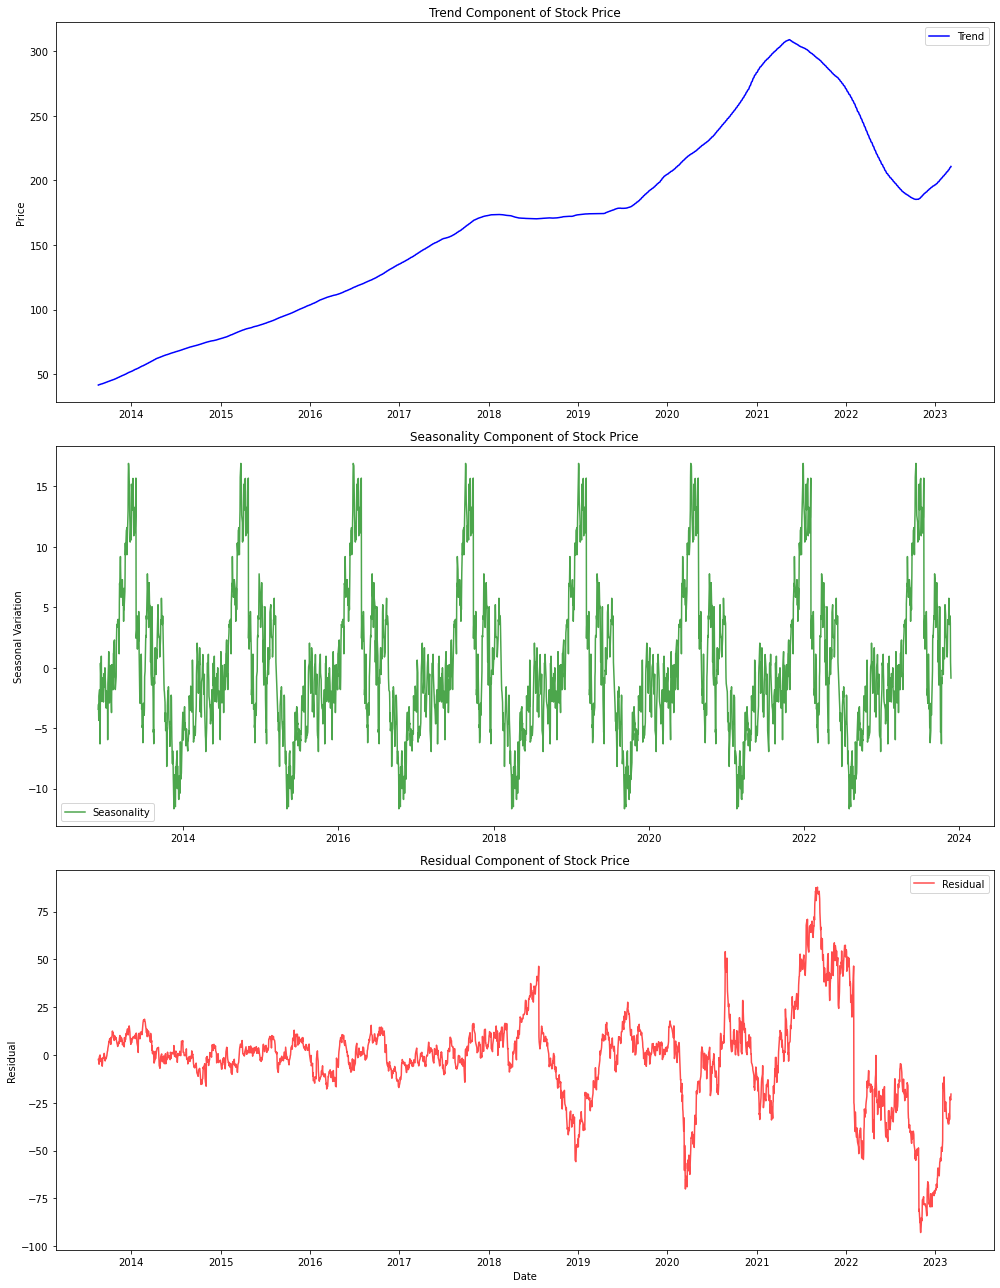

In [24]:
# Creating separate plots for Trend, Seasonality, and Residual

plt.figure(figsize=(14, 18))

# Trend Plot
plt.subplot(3, 1, 1)
plt.plot(meta_data['Date'], trend, label='Trend', color='blue')
plt.title('Trend Component of Stock Price')
plt.ylabel('Price')
plt.legend()

# Seasonality Plot
plt.subplot(3, 1, 2)
plt.plot(meta_data['Date'], seasonal, label='Seasonality', color='green', alpha=0.7)
plt.title('Seasonality Component of Stock Price')
plt.ylabel('Seasonal Variation')
plt.legend()

# Residual Plot
plt.subplot(3, 1, 3)
plt.plot(meta_data['Date'], residual, label='Residual', color='red', alpha=0.7)
plt.title('Residual Component of Stock Price')
plt.ylabel('Residual')
plt.xlabel('Date')
plt.legend()

plt.tight_layout()
plt.show()


The visualizations provide two distinct insights into the stock data:

1. Correlation Heatmap: This heatmap shows the correlation between the closing price and trading volume. A correlation coefficient close to +1 or -1 indicates a strong relationship, while a coefficient around 0 suggests no linear correlation.


2. Time-Series Decomposition: This plot breaks down the closing price into three components:

    Trend: This shows the long-term movement in the data, smoothing out short-term fluctuations.<br>
    
    Seasonality: This represents regular patterns or cycles in the data. In this case, we used a 365-day period to look for yearly patterns.<br>
    
    Residual: These are the irregularities or 'noise' left after removing the trend and seasonality. This component can sometimes reveal anomalies or non-recurring events.

<h2> Anamoly detection</h2>

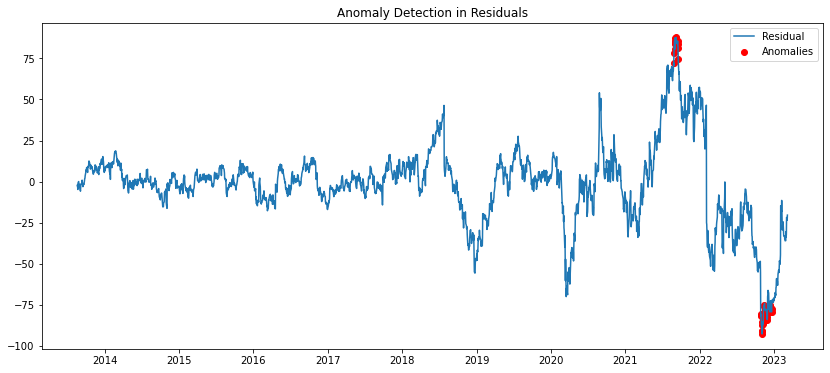

In [17]:
# Ensuring alignment of the date column and the residuals for plotting anomalies
aligned_residuals = residual.reset_index(drop=True)  # Resetting index for alignment
aligned_dates = meta_data['Date'][residual.index]  # Aligning dates with the residuals

# Replotting Anomaly Detection
plt.figure(figsize=(14, 6))
plt.plot(aligned_dates, aligned_residuals, label='Residual')
plt.scatter(aligned_dates[anomalies.index], anomalies, color='red', label='Anomalies')
plt.title('Anomaly Detection in Residuals')
plt.legend()
plt.show()


1. The plot shows the residuals of the stock price with anomalies highlighted in red.
2. Anomalies are identified using a standard Z-score threshold (>3), which flags data points that deviate significantly from the average.
3. These anomalies might represent unusual market activity, such as sharp price changes due to significant news, earnings reports, market shocks, or other extraordinary events.

# Price and Moving Average Crossover

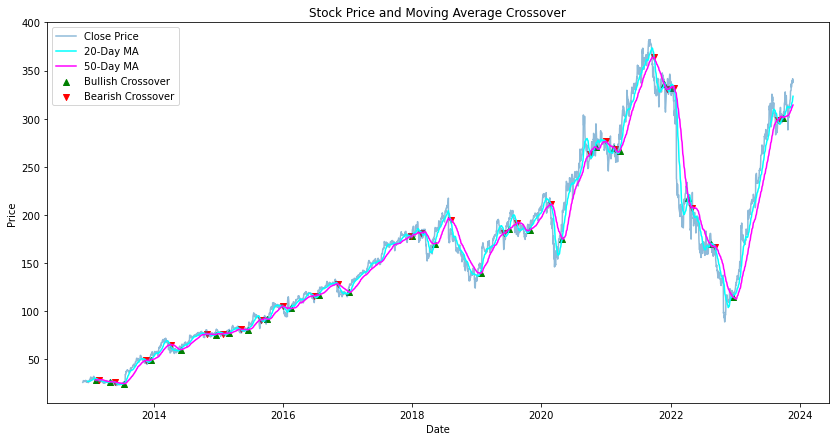

In [18]:
# Calculating additional short-term and long-term moving averages for crossover analysis
meta_data['MA20'] = meta_data['Close'].rolling(window=20).mean()  # 20-day moving average
meta_data['MA50'] = meta_data['Close'].rolling(window=50).mean()  # 50-day moving average

# Creating the plot
plt.figure(figsize=(14, 7))
plt.plot(meta_data['Date'], meta_data['Close'], label='Close Price', alpha=0.5)
plt.plot(meta_data['Date'], meta_data['MA20'], label='20-Day MA', color='cyan')
plt.plot(meta_data['Date'], meta_data['MA50'], label='50-Day MA', color='magenta')

# Highlighting the crossovers
crossovers = pd.DataFrame()
crossovers['Date'] = meta_data['Date']
crossovers['MA20'] = meta_data['MA20']
crossovers['MA50'] = meta_data['MA50']
crossovers['Crossover'] = crossovers['MA20'] - crossovers['MA50']
crossovers['Crossover_Signal'] = 0.0
crossovers['Crossover_Signal'] = np.where(crossovers['Crossover'] > 0, 1.0, 0.0)
crossovers['Crossover_Signal'] = crossovers['Crossover_Signal'].diff()

plt.scatter(crossovers.loc[crossovers['Crossover_Signal'] == 1.0]['Date'], 
            crossovers.loc[crossovers['Crossover_Signal'] == 1.0]['MA50'], 
            color='green', label='Bullish Crossover', marker='^')
plt.scatter(crossovers.loc[crossovers['Crossover_Signal'] == -1.0]['Date'], 
            crossovers.loc[crossovers['Crossover_Signal'] == -1.0]['MA50'], 
            color='red', label='Bearish Crossover', marker='v')

plt.title('Stock Price and Moving Average Crossover')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


The chart above illustrates the stock's closing price along with its 20-day and 50-day moving averages (MAs). This type of visualization is particularly useful for identifying potential buy and sell signals based on moving average crossovers:

1. 20-Day Moving Average (MA20): Shown in cyan, this represents the short-term trend of the stock price.

2. 50-Day Moving Average (MA50): Shown in magenta, this reflects the longer-term trend.

Crossovers:<br>
1. Bullish Crossover: Marked with green triangles (^), occurs when the MA20 crosses above the MA50. This is often interpreted as a buy signal, suggesting that the stock might be entering an uptrend.
2. Bearish Crossover: Marked with red triangles (v), occurs when the MA20 crosses below the MA50. This is often seen as a sell signal, indicating that the stock might be heading into a downtrend.